In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Data Processing

In [5]:
df=pd.read_csv(r"D:\cityu\IS5312\project\BankChurners.csv\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
# let's view the statistical summary of the categorical columns in the data
df.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [7]:
def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue)
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium')  # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0))
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

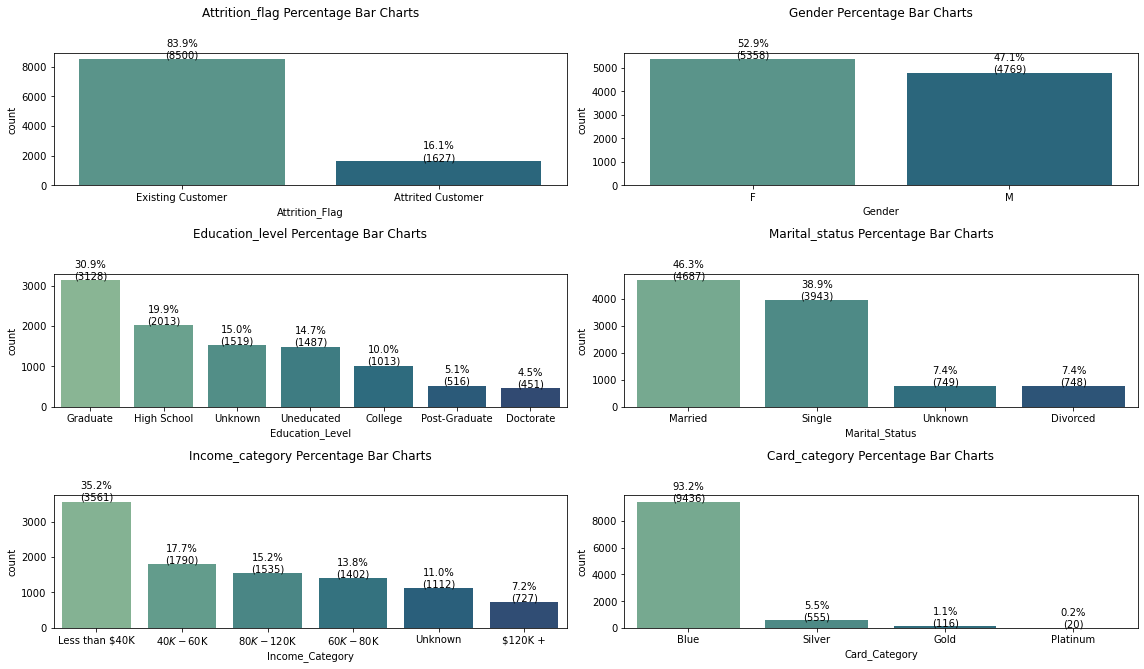

In [8]:
category_columns = df.select_dtypes(include="object").columns.tolist()
target_variable = "Attrition_Flag"
perc_on_bar(df, category_columns, target_variable)
# category_columns

High Imbalance in data since the existing vs. attrited customers ratio is 84:16  
Data is almost equally distributed between Males and Females  
31% customers are Graduate  
85% customers are either Single or Married, where 46.7% of the customers are Married  
35% customers earn less than $40k and 36% customers earn $60k or more  
93% customers have Blue card  

删除客户ID，以及最后两列贝叶斯值
将目标变量设置为0-1

In [9]:
df.drop(columns='CLIENTNUM',inplace=True)
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

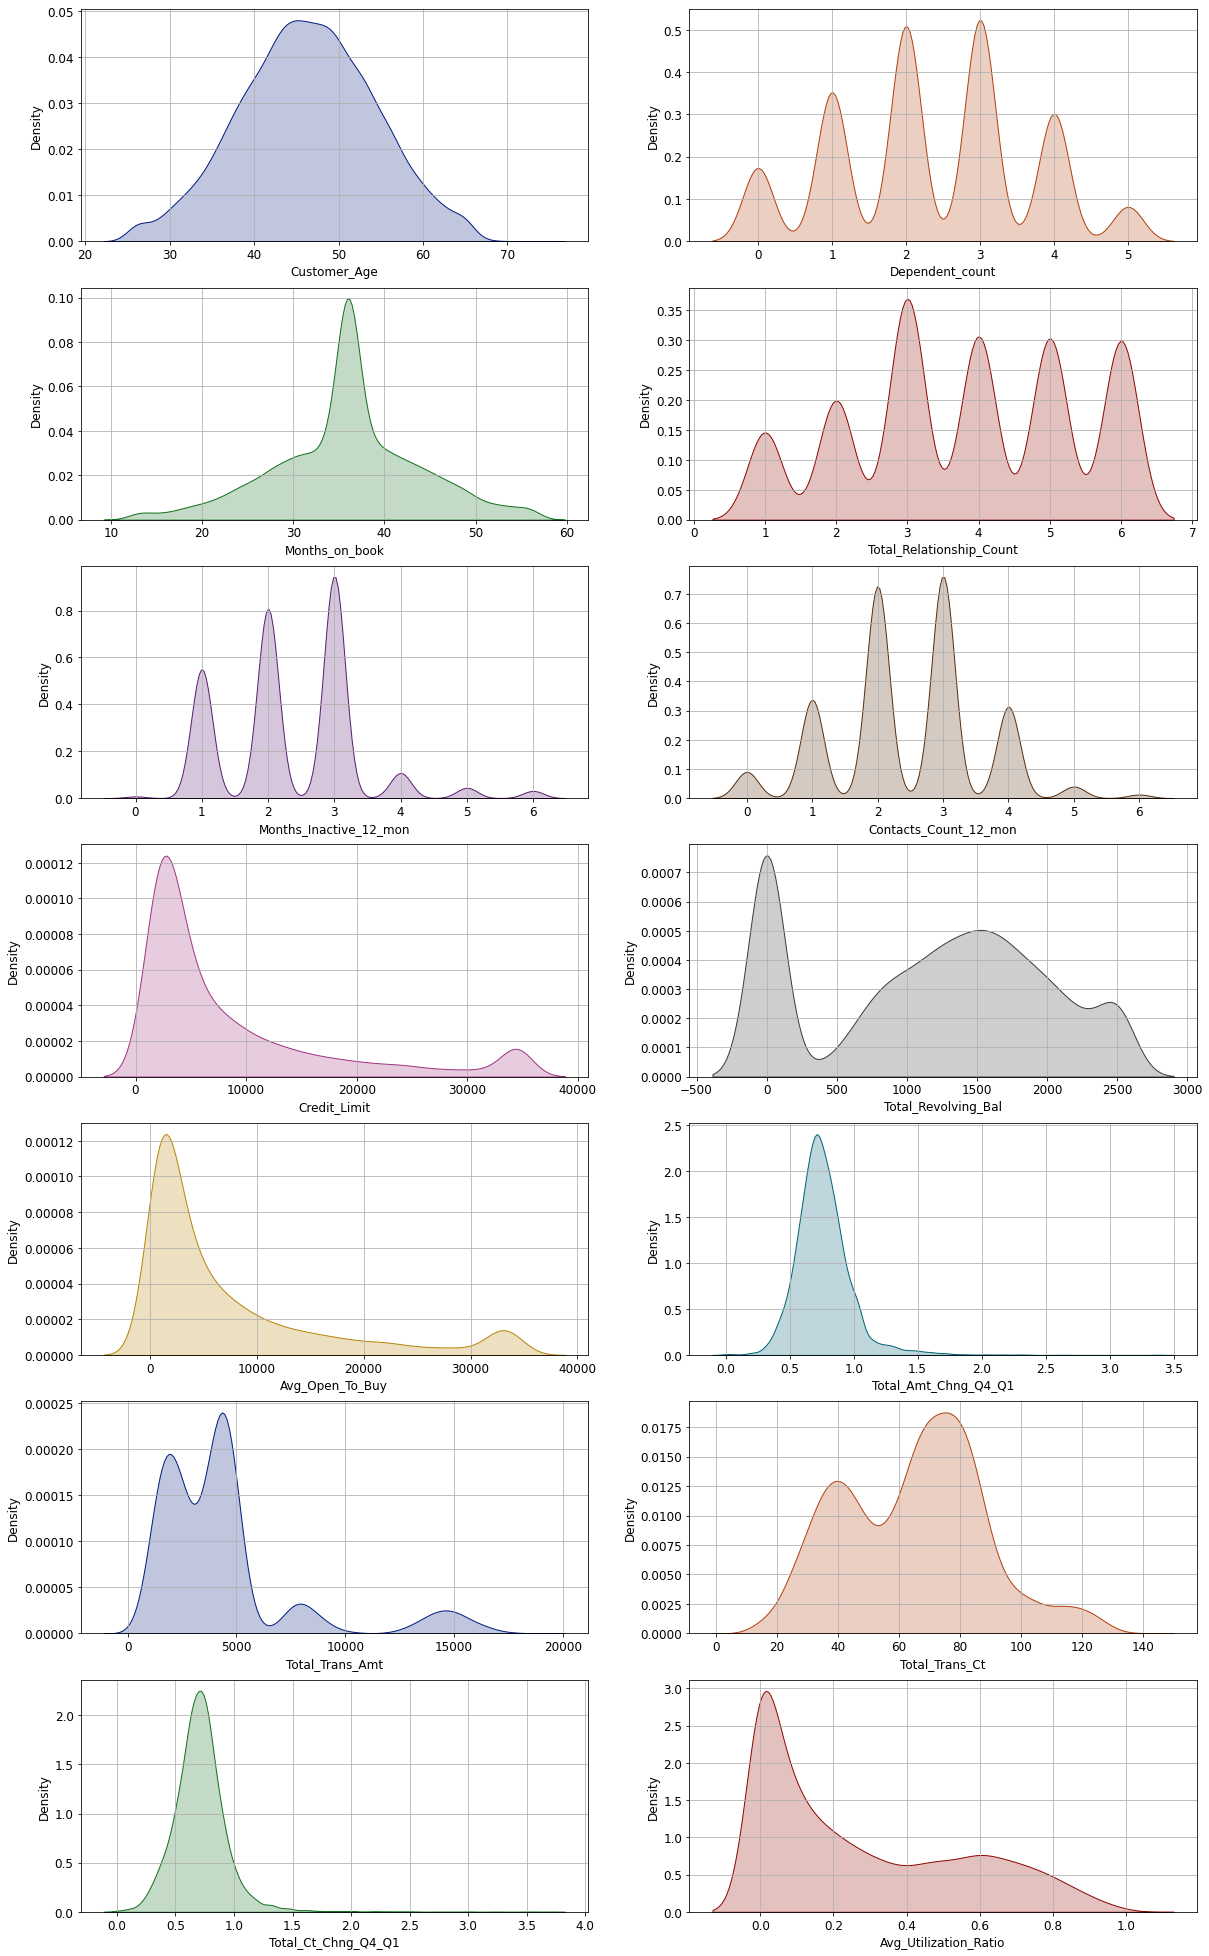

In [10]:
# Select numerical variables
numeric = df.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')
plt.rcParams['font.size'] = 12

colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid(b=None)
# plt.savefig('D:/cityu/IS5312/project/pro/numerical plot.png', bbox_inches = 'tight')

In [11]:
df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [13]:
existing_customer=df['Attrition_Flag']
existing_customer=df[existing_customer==0]

attrited_customer=df['Attrition_Flag']
attrited_customer=df[attrited_customer==1]

num_of_existing=existing_customer['Attrition_Flag'].count()
num_of_attrited=attrited_customer['Attrition_Flag'].count()

print(f' The number of attrited customers is:{num_of_attrited}, while the number of existing customers is:{num_of_existing} ')

 The number of attrited customers is:1627, while the number of existing customers is:8500 


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [15]:
df['Gender'].replace({'M':0,'F':1},inplace=True)
df.replace(to_replace='Unknown',value=np.nan,inplace=True)

### Business Analysis

In [16]:
#查看客户流失占比

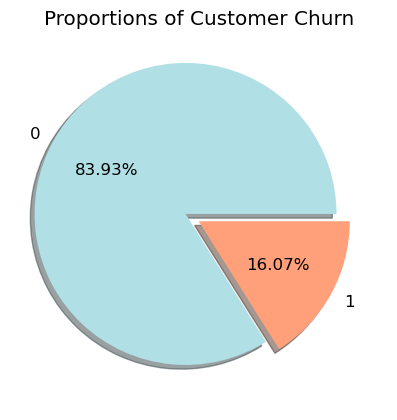

In [17]:
plt.figure(figsize=(5,5),dpi=100)
flag_values=df['Attrition_Flag'].value_counts()
flag_labels=df['Attrition_Flag'].value_counts().index
plt.pie(flag_values,labels=flag_labels,colors=['powderblue','lightsalmon'], explode=(0.1,0),autopct='%.2f%%', shadow=True)
plt.title("Proportions of Customer Churn")
# plt.savefig('D:/cityu/IS5312/project/pro/Proportions of Customer Churn.png', bbox_inches = 'tight')
plt.show()


In [18]:
# sns.heatmap(df.corr(), cmap='Blues')

Text(0.5, 1.0, 'Correlations between Churn and variables')

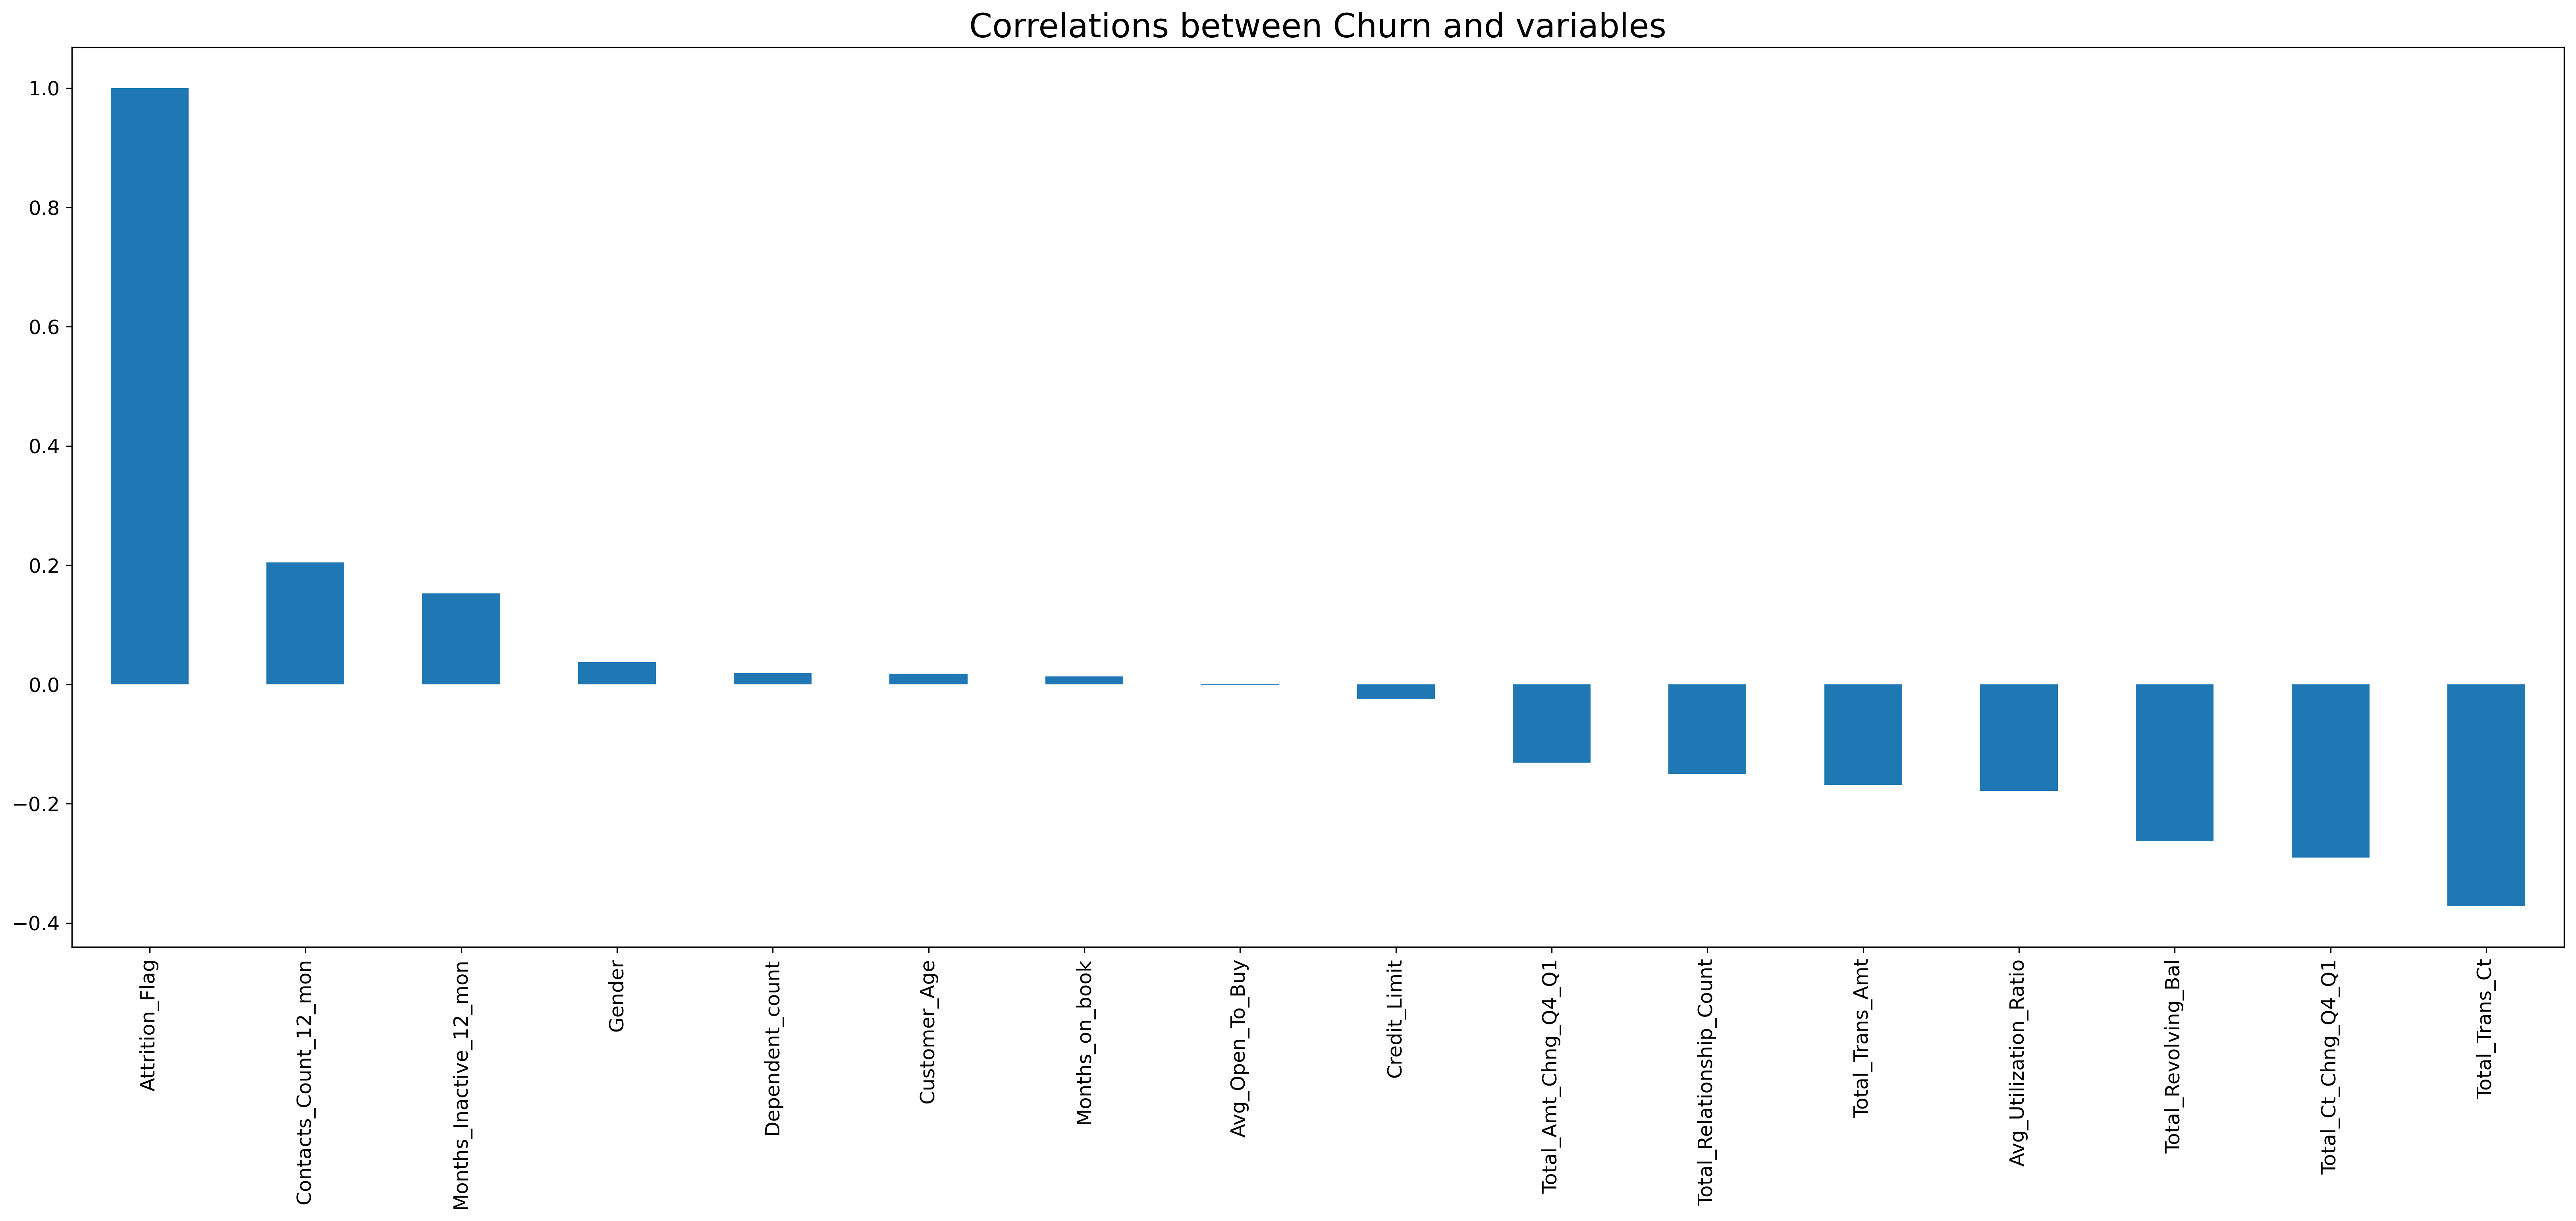

In [19]:
plt.figure(figsize=(27,10),dpi=300)
df.corr()['Attrition_Flag'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlations between Churn and variables',fontdict={'weight':'normal','size': 20})

<AxesSubplot:>

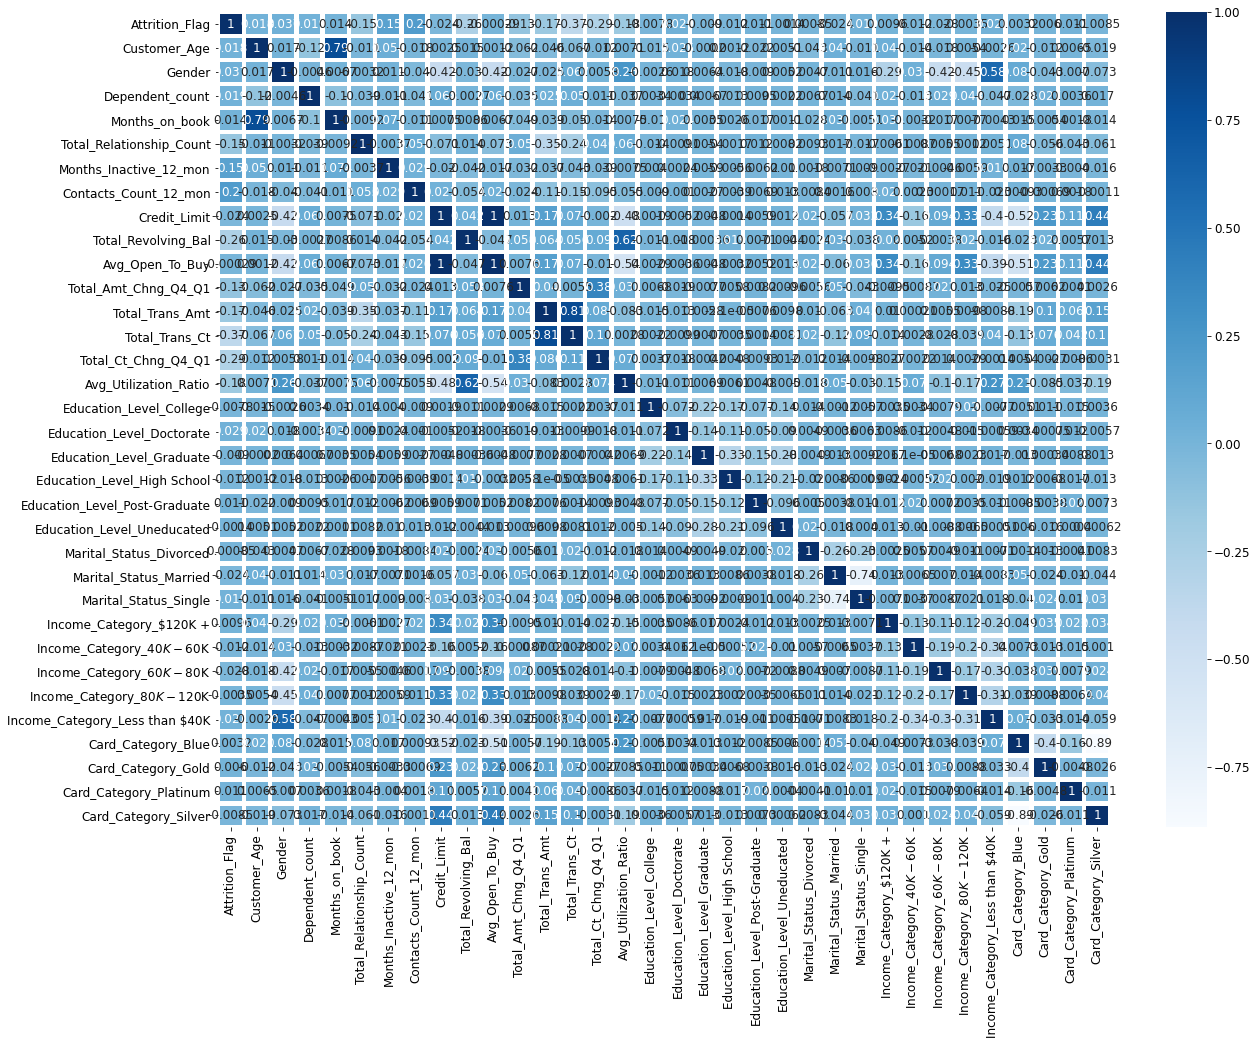

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')
# plt.savefig('D:/cityu/IS5312/project/pro/heat-map.png', bbox_inches = 'tight')

In [20]:
df=pd.get_dummies(df,columns=['Education_Level','Marital_Status','Income_Category','Card_Category'])

In [21]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,0,0,1,0,0,1,0,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,1,0,0,0,0,1,1,0,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,0,0,1,1,0,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,0,0,1,0,0,1,0,0,0


In [22]:
df.corr()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Attrition_Flag,1.000000,0.018203,0.037272,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,...,0.019037,0.009584,-0.011688,-0.028221,-0.003459,0.022466,0.003216,0.005973,0.010823,-0.008467
Customer_Age,0.018203,1.000000,0.017312,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,...,-0.011248,0.044332,-0.013804,-0.017869,0.005381,-0.002573,0.021409,-0.011901,0.006515,-0.019425
Gender,0.037272,0.017312,1.000000,-0.004563,0.006728,-0.003157,0.011163,-0.039987,-0.420806,-0.029658,...,0.015756,-0.294775,0.034718,-0.424892,-0.448017,0.580016,0.085200,-0.043453,-0.007048,-0.072699
Dependent_count,0.018991,-0.122254,-0.004563,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,...,-0.040707,0.024831,-0.013493,0.028975,0.047611,-0.046785,-0.027671,0.027035,0.003555,0.017322
Months_on_book,0.013687,0.788912,0.006728,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,...,-0.005065,0.033532,-0.003204,-0.016635,0.007720,-0.004300,0.014934,-0.005426,0.001791,-0.014357
Total_Relationship_Count,-0.150005,-0.010931,-0.003157,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,...,-0.017329,-0.006090,-0.008747,0.005475,0.001185,0.005109,0.085789,-0.055678,-0.043289,-0.060566
Months_Inactive_12_mon,0.152449,0.054361,0.011163,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,...,0.008973,-0.002661,-0.021437,-0.004616,-0.005910,0.018848,0.016565,-0.003283,-0.004013,-0.016034
Contacts_Count_12_mon,0.204491,-0.018452,-0.039987,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,...,0.007997,0.020744,0.002336,0.000167,0.011473,-0.023255,0.000929,-0.000685,0.001797,-0.001059
Credit_Limit,-0.023873,0.002476,-0.420806,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,...,0.032309,0.339211,-0.161605,0.093808,0.333828,-0.395233,-0.515644,0.234331,0.105976,0.441030
Total_Revolving_Bal,-0.263053,0.014780,-0.029658,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,...,-0.037794,0.020264,0.005220,-0.003847,0.022776,-0.015974,-0.022681,0.023974,0.005739,0.012799


In [23]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

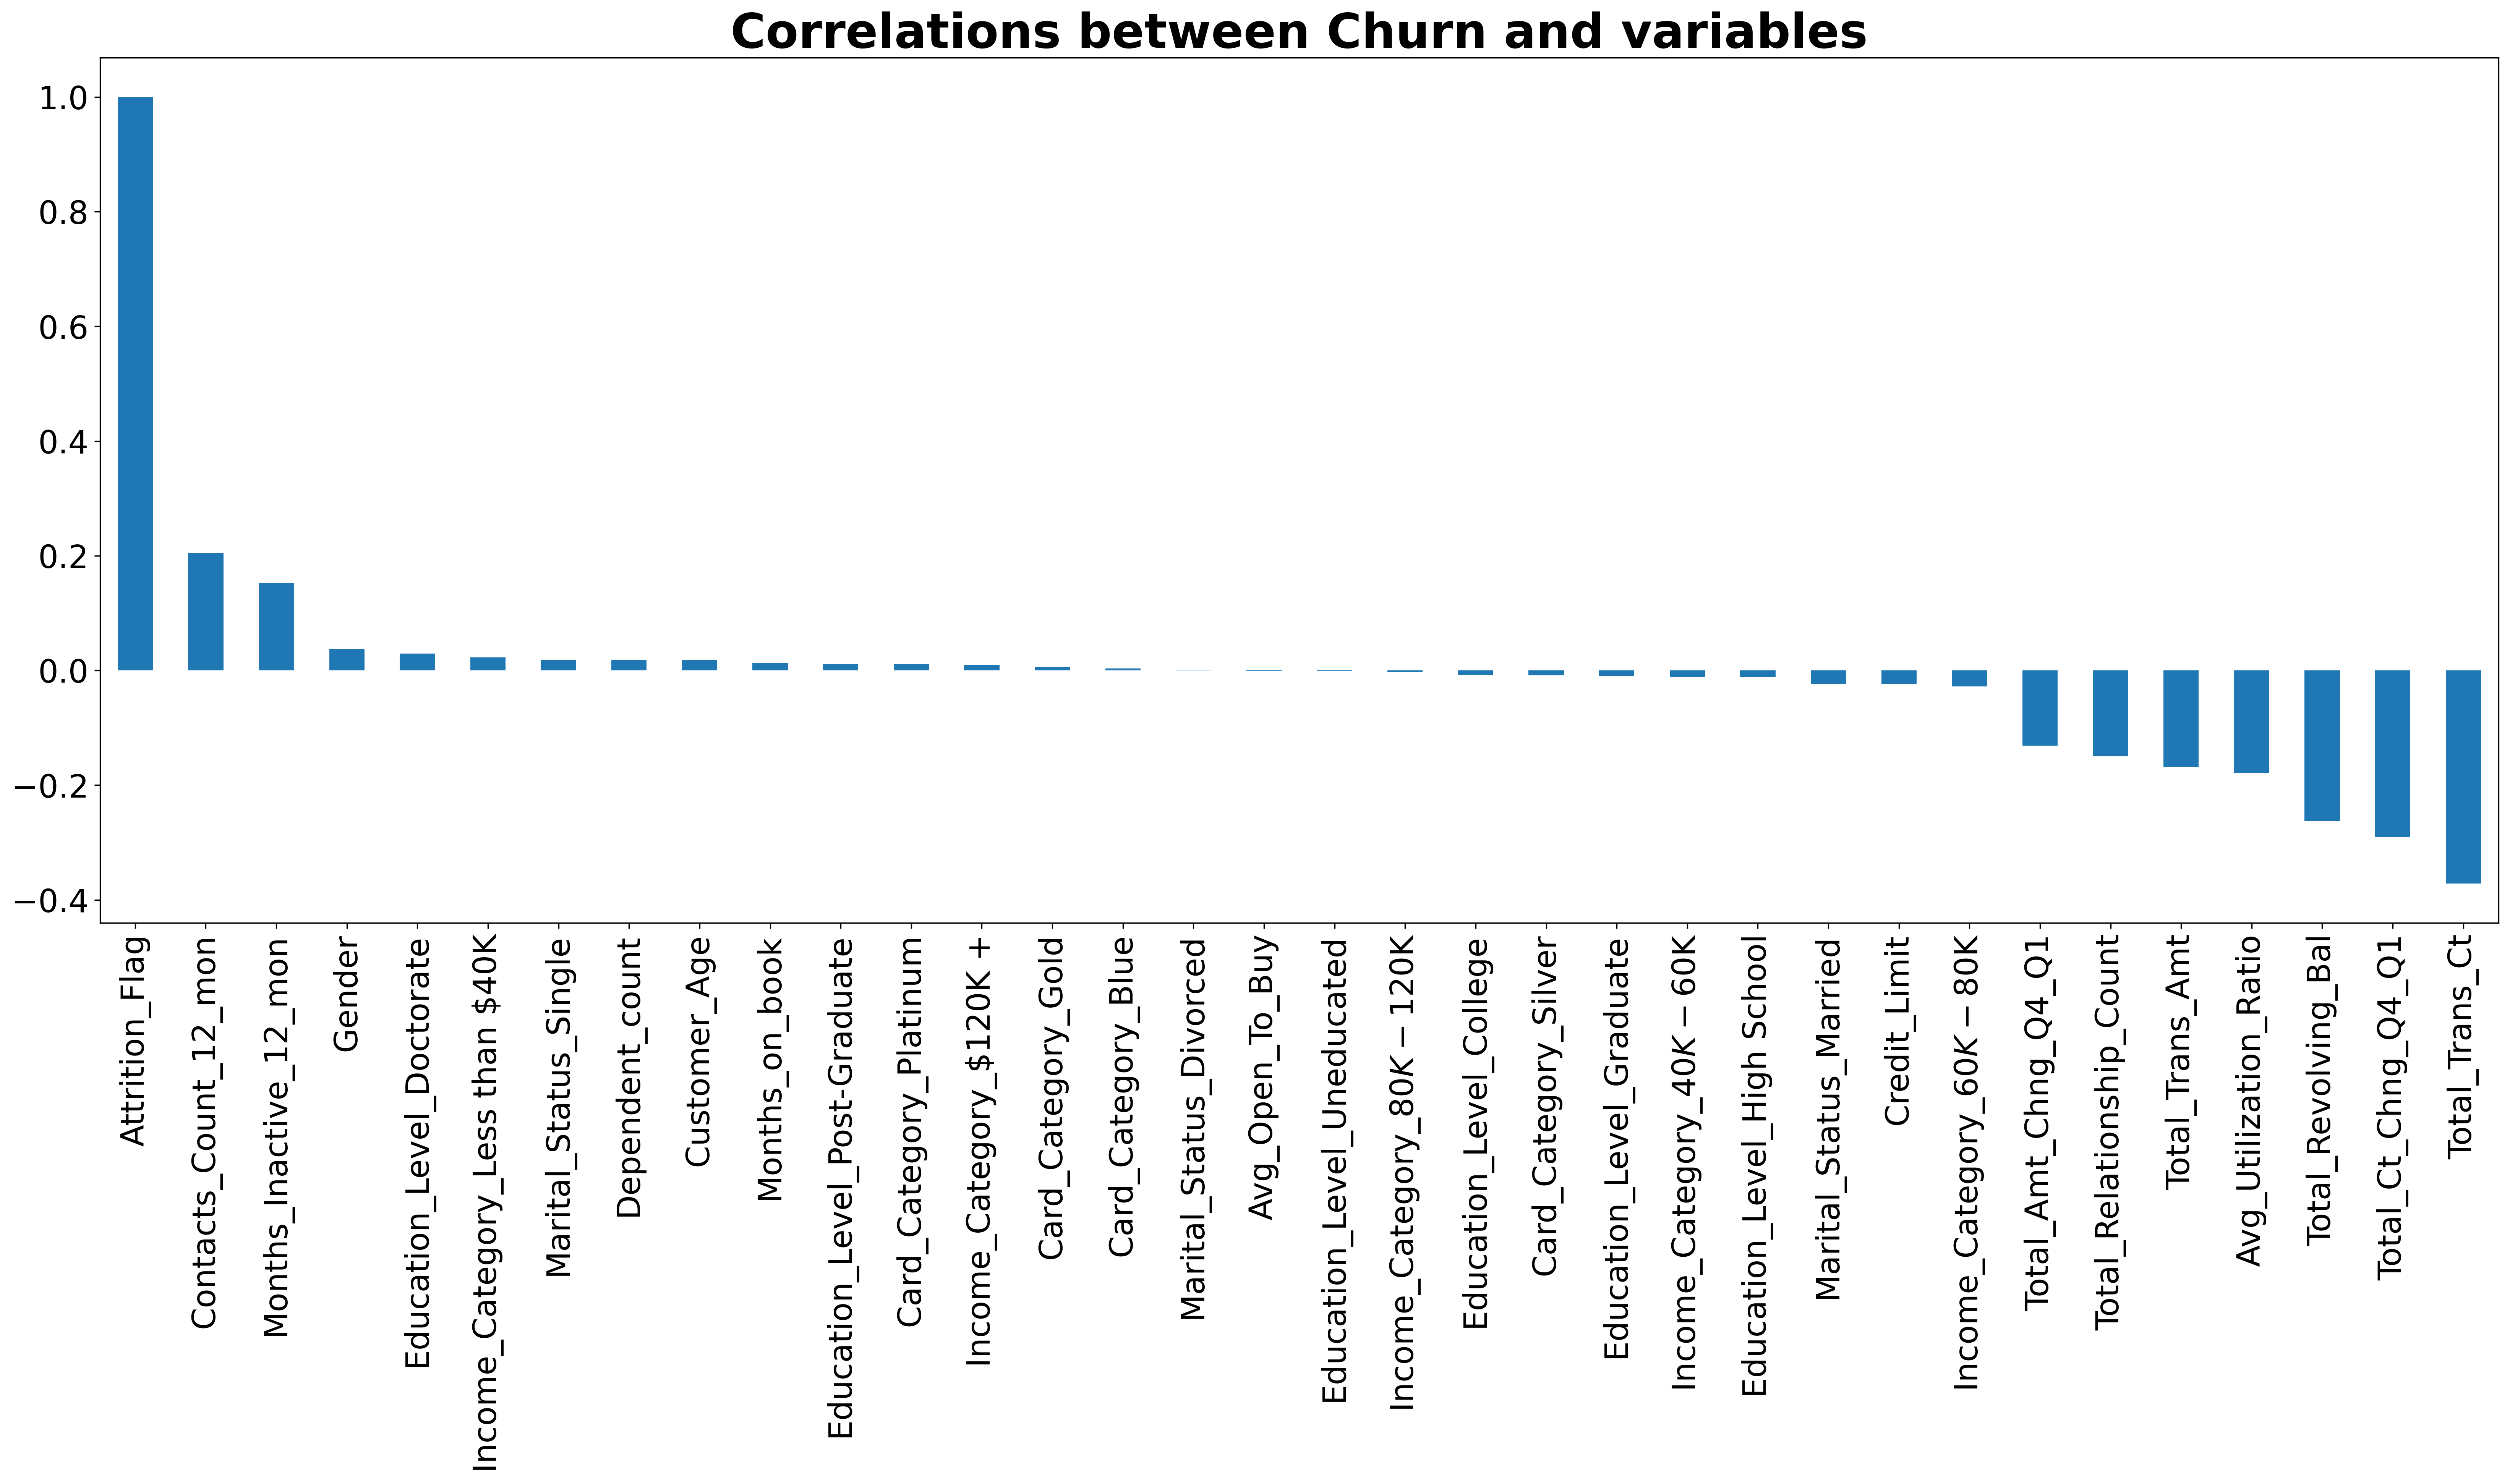

In [24]:
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(27,10),dpi=300)
df.corr()['Attrition_Flag'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlations between Churn and variables',fontdict={'weight':'bold','size': 30})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
# plt.savefig('D:/cityu/IS5312/project/pro/COR.png', bbox_inches = 'tight')

In [26]:
# df.to_csv('D:/cityu/IS5312/project/bank_data.csv',index=False)

## Building Models

Replace the unknown data with the median of each column to avoid outliers.

In [27]:
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X= imputer.fit_transform(X)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train,test_size=0.2, random_state=0)

### Regression--回归

In [29]:
# 注意观察，有一个参数penalty的默认参数是l2，这说明sklearn中默认是使用L2正则项的，且超参数C默认1。
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0,max_iter=1000)
LR.fit(x_train,y_train)
LR.score(x_test, y_test)
# print("logistic test score: {:.2f}".format(LR.score(x_test, y_test)))

0.8938795656465943

LogisticRegression和LogisticRegressionCV默认就带了正则化项。penalty参数可选择的值为"l1"和"l2".分别对应L1的正则化和L2的正则化，默认是L2的正则化。  
在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，就可以考虑L1正则化。  
另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化。


In [30]:
# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=df.iloc[:,1:]
vif = [variance_inflation_factor(v.values, v.columns.get_loc(i)) for i in v.columns]
print('--- vif ---')
print(vif)

--- vif ---
[2.691857792429324, 3.484001358857867, 1.0459182236939701, 2.6610845085774475, 1.1588597984626128, 1.0125371129040117, 1.0389094860143986, inf, inf, inf, 1.1959313869325094, 3.3290326792147558, 3.115440247159501, 1.2104896043718298, 3.003387969246966, 1.5043096052380862, 1.2427298555294939, 2.1175709167159407, 1.865834208736158, 1.274719513628306, 1.692475582752861, 1.857567899311716, 3.933001875348421, 3.843346764224687, 2.529970829457677, 2.5505583608678286, 3.4661349096803216, 3.754756235853306, 2.974002637067686, 123.23997480755706, 2.745300199099865, 1.304735685921539, 9.003384842651721]


构建逻辑回归，使用不同的正则化

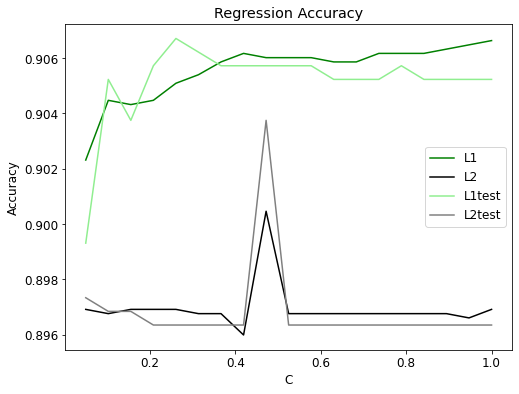

In [31]:
from sklearn.metrics import accuracy_score
l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1.5,19):
    lrl1 = LogisticRegression(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LogisticRegression(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(x_train,y_train)
    l1.append(accuracy_score(lrl1.predict(x_train),y_train))
    l1test.append(accuracy_score(lrl1.predict(x_test),y_test))
    lrl2 = lrl2.fit(x_train,y_train)
    l2.append(accuracy_score(lrl2.predict(x_train),y_train))
    l2test.append(accuracy_score(lrl2.predict(x_test),y_test))
    
graph =[l1,l2,l1test,l2test]
color =["green","black","lightgreen","gray"]
label =["L1","L2","L1test","L2test"]


plt.figure(figsize=(8,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=0)
plt.title('Regression Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
# plt.savefig('D:/cityu/IS5312/project/Regression.png', bbox_inches = 'tight')
plt.show()

根据图中显示，L1正则化效果要比L2正则化效果更好，准确率更高

In [32]:
from sklearn.metrics import classification_report

In [33]:
LR_=LogisticRegression(penalty="l1",solver="liblinear",random_state=0,max_iter=1000)
LR_.fit(x_train,y_train)
LR_.score(x_test, y_test)

0.9052319842053307

In [34]:
x_train.shape

(6480, 33)

In [35]:
from sklearn.feature_selection import SelectFromModel
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(x_train,y_train)
X_embedded.shape

(6480, 29)

In [36]:
y_reg = LR_.predict(x_test)
# 打印主要分类指标的文本报告
print('--- report ---')
print(classification_report(y_test, y_reg))

--- report ---
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1717
           1       0.73      0.60      0.66       309

    accuracy                           0.91      2026
   macro avg       0.83      0.78      0.80      2026
weighted avg       0.90      0.91      0.90      2026



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

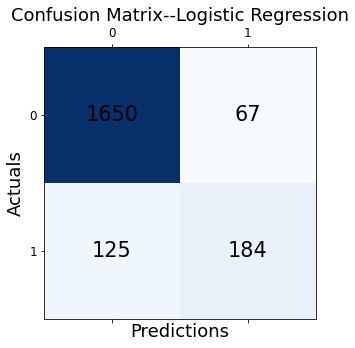

In [40]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_reg)

#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix--Logistic Regression', fontsize=18)
# plt.savefig('D:/cityu/IS5312/project/pro/LR CM.png', bbox_inches = 'tight')
plt.show()

### NeuralNetwork -- 神经网络

In [41]:
X.shape

(10127, 33)

In [42]:
import tensorflow as tf
from keras.layers import Dense,LSTM,Dropout

# 创建模型
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32, input_shape=(33,), activation='relu'))  # 第一层
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))  # 第二层   自动推断输入层
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))  # 第三层   自动推断输入层
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 第四层 激活函数选择sigmod  将输出结果映射到sigmoid函数上 输出一个概率
# 编译  =---优化器，损失函数，评估函数
model.compile(optimizer='adam',  # rmspropadam
              loss='binary_crossentropy',
              metrics=['acc'],
              )
# 训练模型---输入参数
history = model.fit(x_train,y_train,
                    epochs=100,  # epochs训练迭代轮次
                    validation_data=(x_val,y_val))  

Epoch 1/100
203/203 [==============================] - 0s 2ms/step - loss: 57.7677 - acc: 0.7506 - val_loss: 5.4490 - val_acc: 0.8439
Epoch 2/100
203/203 [==============================] - 0s 996us/step - loss: 18.1955 - acc: 0.7577 - val_loss: 1.6028 - val_acc: 0.8507
Epoch 3/100
203/203 [==============================] - 0s 1ms/step - loss: 8.0039 - acc: 0.7653 - val_loss: 2.4206 - val_acc: 0.8439
Epoch 4/100
203/203 [==============================] - 0s 964us/step - loss: 4.4221 - acc: 0.7713 - val_loss: 0.6722 - val_acc: 0.7428
Epoch 5/100
203/203 [==============================] - 0s 924us/step - loss: 2.7747 - acc: 0.7710 - val_loss: 0.4572 - val_acc: 0.8470
Epoch 6/100
203/203 [==============================] - 0s 919us/step - loss: 1.9592 - acc: 0.7711 - val_loss: 0.6326 - val_acc: 0.8439
Epoch 7/100
203/203 [==============================] - 0s 909us/step - loss: 1.3408 - acc: 0.7810 - val_loss: 0.5819 - val_acc: 0.8445
Epoch 8/100
203/203 [==============================] - 0s

203/203 [==============================] - 0s 929us/step - loss: 0.3503 - acc: 0.8356 - val_loss: 0.3151 - val_acc: 0.8439
Epoch 60/100
203/203 [==============================] - 0s 909us/step - loss: 0.3375 - acc: 0.8353 - val_loss: 0.3198 - val_acc: 0.8439
Epoch 61/100
203/203 [==============================] - 0s 860us/step - loss: 0.3478 - acc: 0.8353 - val_loss: 0.3198 - val_acc: 0.8439
Epoch 62/100
203/203 [==============================] - 0s 879us/step - loss: 0.3326 - acc: 0.8349 - val_loss: 0.3416 - val_acc: 0.8439
Epoch 63/100
203/203 [==============================] - 0s 899us/step - loss: 0.3369 - acc: 0.8352 - val_loss: 0.3107 - val_acc: 0.8760
Epoch 64/100
203/203 [==============================] - 0s 879us/step - loss: 0.3446 - acc: 0.8349 - val_loss: 0.3338 - val_acc: 0.8439
Epoch 65/100
203/203 [==============================] - 0s 865us/step - loss: 0.3462 - acc: 0.8353 - val_loss: 0.3182 - val_acc: 0.8439
Epoch 66/100
203/203 [==============================] - 0s 87

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
______________________________________________________

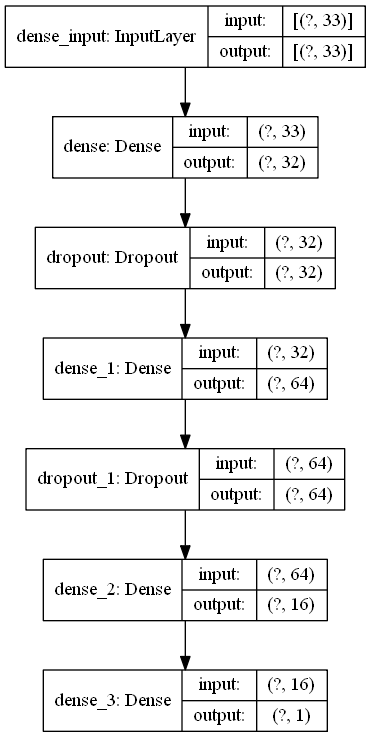

In [43]:
model.summary()  # 简单查看网络结构
# 画图查看网络结构
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))
plot_model(model,show_shapes=True)

In [44]:
gailv = model.predict(x_test)
print(gailv)
# # 输出概率后6位小数
# for i in gailv:
#     print("%.6f" % i)

# print(gailv)

# for i in gailv:
#     if i > 0.5:
#         print(1)
#     else:
#         print(0)


[[0.08459726]
 [0.6060656 ]
 [0.05035084]
 ...
 [0.3872111 ]
 [0.04302132]
 [0.12247857]]


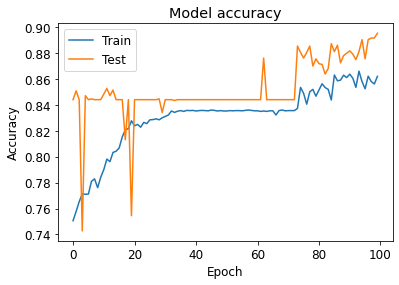

In [45]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

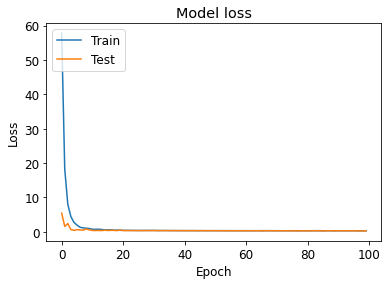

In [46]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
from sklearn import metrics
y_pred = model.predict_classes(x_test, batch_size = 5, verbose = 1)
target_names = ['1', '0']
print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))
loss, accuracy = model.evaluate(x_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
406/406 [==============================] - 0s 364us/step
              precision    recall  f1-score   support

           1       0.91      0.98      0.94      1717
           0       0.78      0.47      0.59       309

    accuracy                           0.90      2026
   macro avg       0.85      0.72      0.77      2026
weighted avg       0.89      0.90      0.89      2026

64/64 [==============================] - 0s 495us/step - loss: 0.2716 - acc: 0.8993
test loss:  0.2716350257396698
test accuracy:  0.899308979511261


In [48]:
# 打印主要分类指标的文本报告
print('--- report ---')
print(classification_report(y_test, y_pred))

--- report ---
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1717
           1       0.78      0.47      0.59       309

    accuracy                           0.90      2026
   macro avg       0.85      0.72      0.77      2026
weighted avg       0.89      0.90      0.89      2026



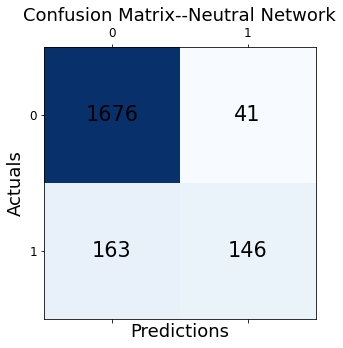

In [49]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix--Neutral Network', fontsize=18)
# plt.savefig('D:/cityu/IS5312/project/pro/NW CM.png', bbox_inches = 'tight')
plt.show()

### DecisionTree--决策树

In [50]:
#初始决策树
clf_plot = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_plot = clf_plot.fit(x_train, y_train)
Accuracy= clf_plot.score(x_test,y_test)
print(Accuracy)

0.9358341559723593


In [51]:
clf_plot = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
clf_plot = clf_plot.fit(x_train, y_train)
Accuracy= clf_plot.score(x_test,y_test)
print(Accuracy)

0.9402764067127345


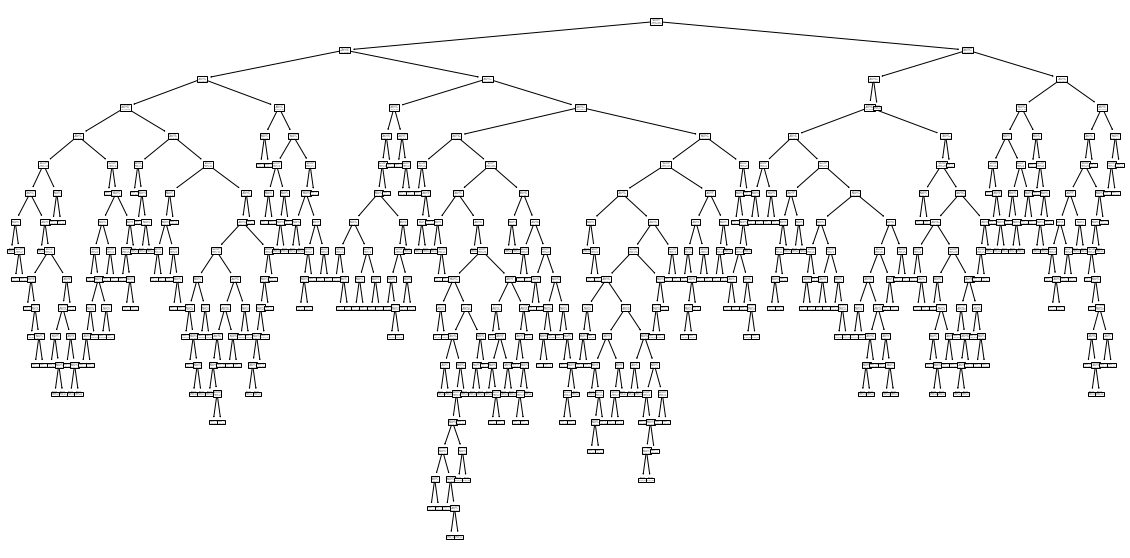

In [52]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_plot)
plt.show()

In [53]:
clf_plot.get_depth()

18

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

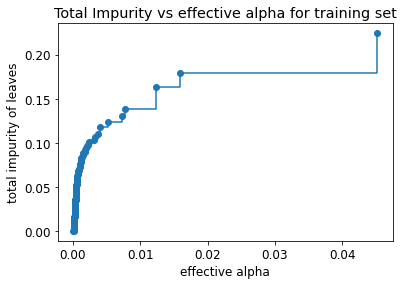

In [54]:
path = clf_plot.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# ccp_alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

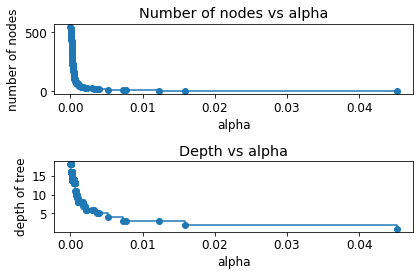

In [55]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
# print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#       clfs[-1].tree_.node_count, ccp_alphas[-1]))
#最后一个ccp_alpha剪掉了所有的枝，只剩了一个节点
#去掉最后一个alpha以及对应的clfs
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

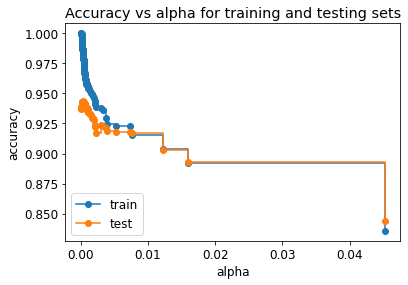

In [56]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_val,y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend(loc=3)
plt.show()

In [57]:
clf_plot = tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=11)
clf_plot = clf_plot.fit(x_train, y_train)
Accuracy= clf_plot.score(x_test,y_test)
print(Accuracy)

0.9442250740375123


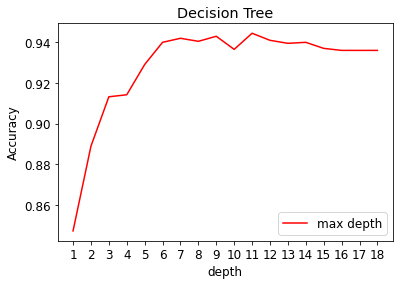

In [58]:
test = []
for i in range(18):
    clfs = tree.DecisionTreeClassifier(max_depth = i+1
                                     ,criterion = 'entropy'
                                     ,random_state = 0
                                     ,splitter = 'best')
    clfs = clfs.fit(x_train, y_train)
    score = clfs.score(x_test,y_test)
    test.append(score)
plt.plot(range(1,19),test,color='red',label='max depth')
plt.xticks(range(1,19))
plt.legend()
plt.title('Decision Tree')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()

In [59]:
feature_name = ['Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver']

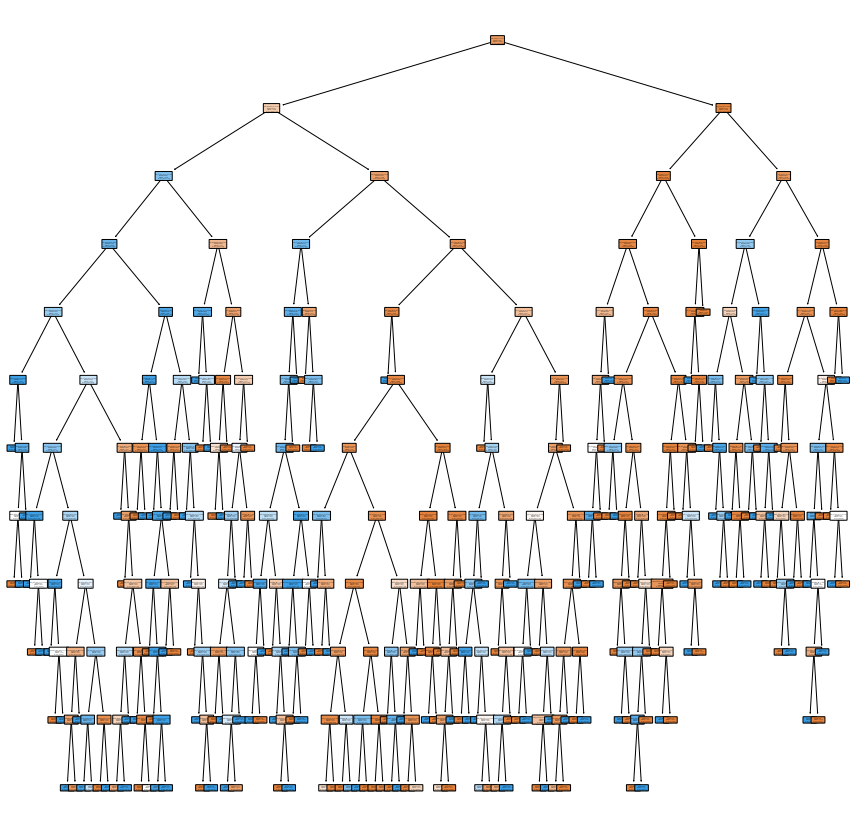

In [60]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf_plot,feature_names = feature_name,class_names=['Existing Customer','Attrited Customer'],filled = True,proportion=True,rounded = True)
plt.show()

In [61]:
clf_p = tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=11)
clf_p = clf_p.fit(x_train, y_train)
Accuracy= clf_p.score(x_test,y_test)
print(Accuracy)

0.9442250740375123


In [62]:
y_clf = clf_p.predict(x_test)
# 打印主要分类指标的文本报告
print('--- report ---')
print(classification_report(y_test, y_clf))

--- report ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1717
           1       0.81      0.83      0.82       309

    accuracy                           0.94      2026
   macro avg       0.89      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026



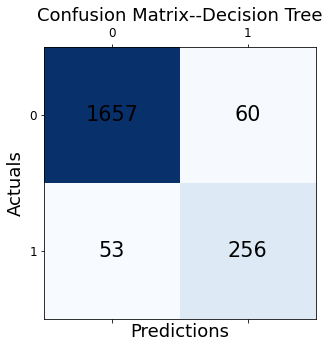

In [63]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_clf)

#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix--Decision Tree', fontsize=18)
# plt.savefig('D:/cityu/IS5312/project/pro/DT CM.png', bbox_inches = 'tight')
plt.show()

In [64]:
clf_p = tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=2)
clf_p = clf_p.fit(x_train, y_train)

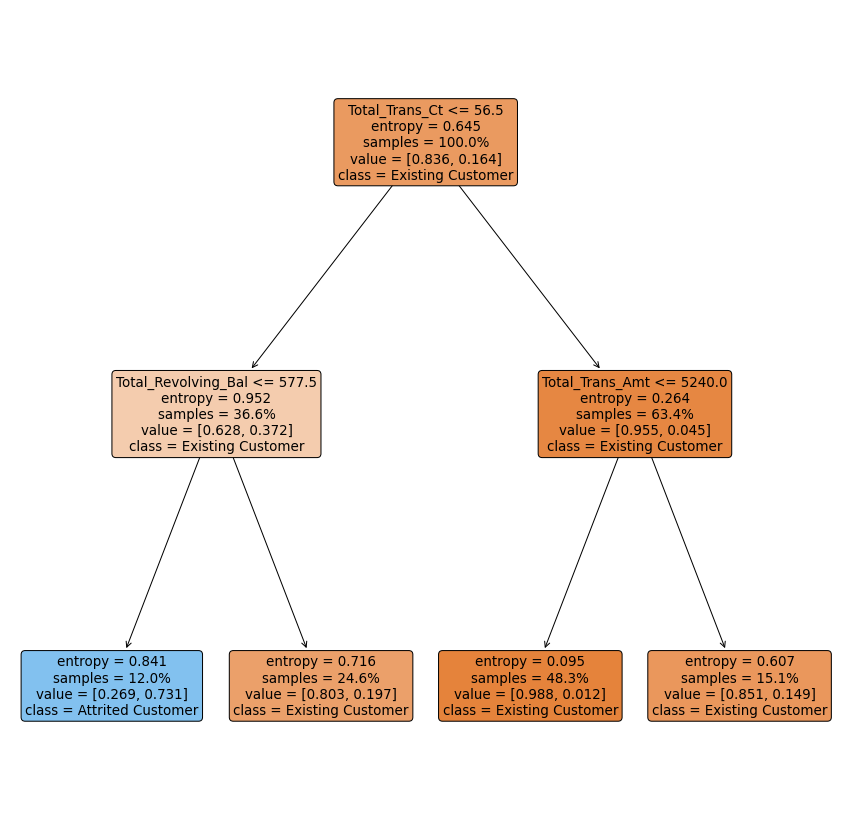

In [65]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf_p,feature_names = feature_name,class_names=['Existing Customer','Attrited Customer'],filled = True,proportion=True,rounded = True)
plt.show()

### RandomForest--随机森林

In [66]:
forest=RandomForestClassifier()
train=forest.fit(x_train,y_train)
acc=train.score(x_test,y_test)
print(f' The model accuracy on the validation data is :{acc:.2%}')

 The model accuracy on the validation data is :94.97%


Many features can make someone leave his bank, not all of them were taken into account here, such as relocation, death, having a bigger family, etc. Additionally, there is a lot of unknown data and although the median can solve it, it may mislead us, but in general, the model predicted very well the test data with an accuracy of 95%

0.9426267807045953 35


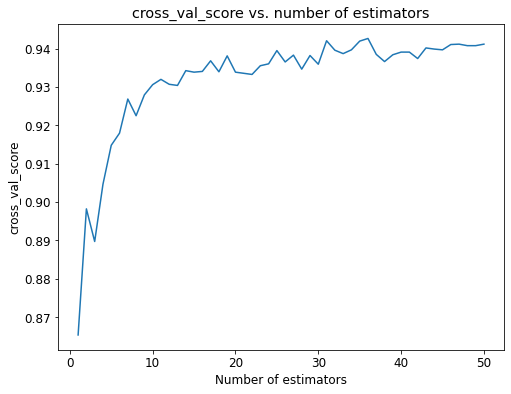

In [67]:
from sklearn.model_selection import cross_val_score
superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,X,Y,cv=10)
    rfc_s = rfc_s.mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=(8,6))
plt.plot(range(1,51),superpa)
plt.xlabel('Number of estimators')
plt.ylabel('cross_val_score')
plt.title('cross_val_score vs. number of estimators')
plt.show()

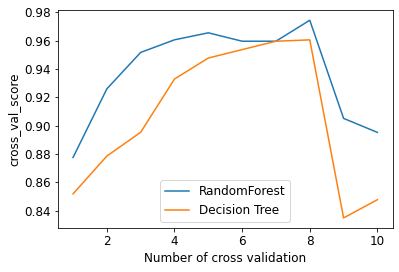

In [68]:
rfc = RandomForestClassifier(n_estimators=25,random_state=0)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.xlabel('Number of cross validation')
plt.ylabel('cross_val_score')
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

In [69]:
rfc_n = RandomForestClassifier(n_estimators=25,random_state=0)
train=rfc_n.fit(x_train,y_train)
acc=train.score(x_test,y_test)
print(f' The model accuracy on the validation data is :{acc:.2%}')

 The model accuracy on the validation data is :94.52%


In [70]:
y_rfc = rfc_n.predict(x_test)
# 打印主要分类指标的文本报告
print('--- report ---')
print(classification_report(y_test, y_rfc))

--- report ---
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1717
           1       0.88      0.74      0.80       309

    accuracy                           0.95      2026
   macro avg       0.92      0.86      0.89      2026
weighted avg       0.94      0.95      0.94      2026



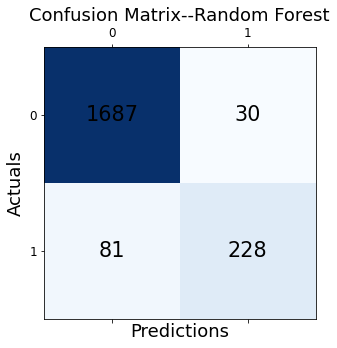

In [71]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_rfc)

#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix--Random Forest', fontsize=18)
# plt.savefig('D:/cityu/IS5312/project/pro/RF CM.png', bbox_inches = 'tight')
plt.show()

## Model Evaluation

### ROC&AUC

In [72]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc 

classifiers = [
#     SVC(C=0.025),
    tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10),
    RandomForestClassifier(random_state=0,max_depth=10),
#     AdaBoostClassifier(),
    LogisticRegression(penalty="l1",solver="liblinear",random_state=0,max_iter=1000)]

In [73]:
y_pred_keras = model.predict(x_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred_keras)   
roc_auc = auc(fpr,tpr)
# plt.plot(fpr, tpr, 'b', label='Keras AUC = %0.2f' % roc_auc)
# plt.legend(loc='lower right')
# plt.xlabel('FP Rate')
# plt.ylabel('TP Rate')
# plt.show()

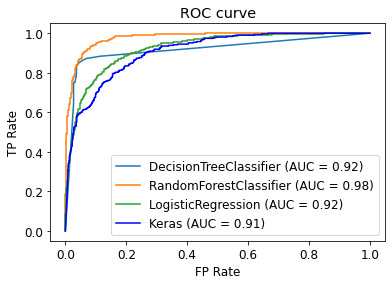

In [74]:
fig, ax = plt.subplots()

model_displays = {}
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = type(clf).__name__
    model_displays[type(clf).__name__] = plot_roc_curve(
        clf, x_test, y_test, ax=ax, name=name)
plt.plot(fpr, tpr, 'b', label='Keras (AUC = %0.2f)' % roc_auc)
plt.legend()
_ = ax.set_title('ROC curve')
_ = ax.set_xlabel('FP Rate')
_ = ax.set_ylabel('TP Rate')
# plt.savefig('D:/cityu/IS5312/project/pro/ROC.png', bbox_inches = 'tight')